<a href="https://colab.research.google.com/github/Sakshi-2100/flask-app/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Data/skin cancer detection/melanoma_cancer_dataset/train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Data/skin cancer detection/melanoma_cancer_dataset/train')


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


9615
9615


In [ ]:
batch_size = 32
img_height = 180
img_width = 180


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)


Found 9615 files belonging to 2 classes.
Using 7692 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 9615 files belonging to 2 classes.
Using 1923 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['benign', 'malignant']


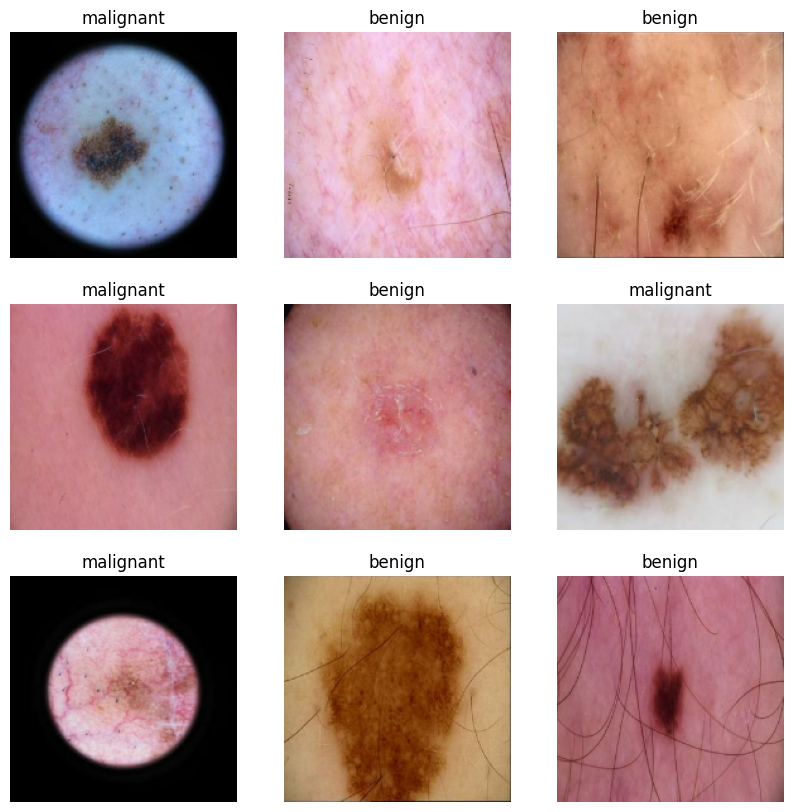

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = 9 # As target class has 9 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
241/241 [==============================] - 397s 2s/step - loss: 0.2156 - accuracy: 0.9147 - val_loss: 0.2635 - val_accuracy: 0.8804
Epoch 2/10
241/241 [==============================] - 373s 2s/step - loss: 0.2022 - accuracy: 0.9181 - val_loss: 0.2310 - val_accuracy: 0.9054
Epoch 3/10
241/241 [==============================] - 368s 2s/step - loss: 0.1876 - accuracy: 0.9258 - val_loss: 0.2302 - val_accuracy: 0.9069
Epoch 4/10
241/241 [==============================] - 366s 2s/step - loss: 0.1856 - accuracy: 0.9277 - val_loss: 0.2371 - val_accuracy: 0.9100
Epoch 5/10
241/241 [==============================] - 378s 2s/step - loss: 0.1658 - accuracy: 0.9356 - val_loss: 0.3355 - val_accuracy: 0.8752
Epoch 6/10
241/241 [==============================] - 391s 2s/step - loss: 0.1523 - accuracy: 0.9401 - val_loss: 0.3182 - val_accuracy: 0.8830
Epoch 7/10
241/241 [==============================] - 365s 2s/step - loss: 0.1448 - accuracy: 0.9444 - val_loss: 0.2397 - val_accuracy: 0.9132

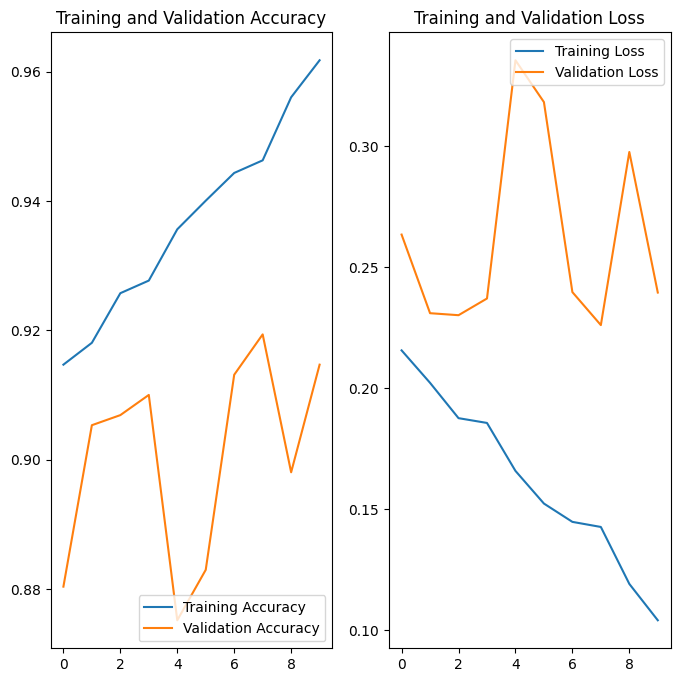

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])


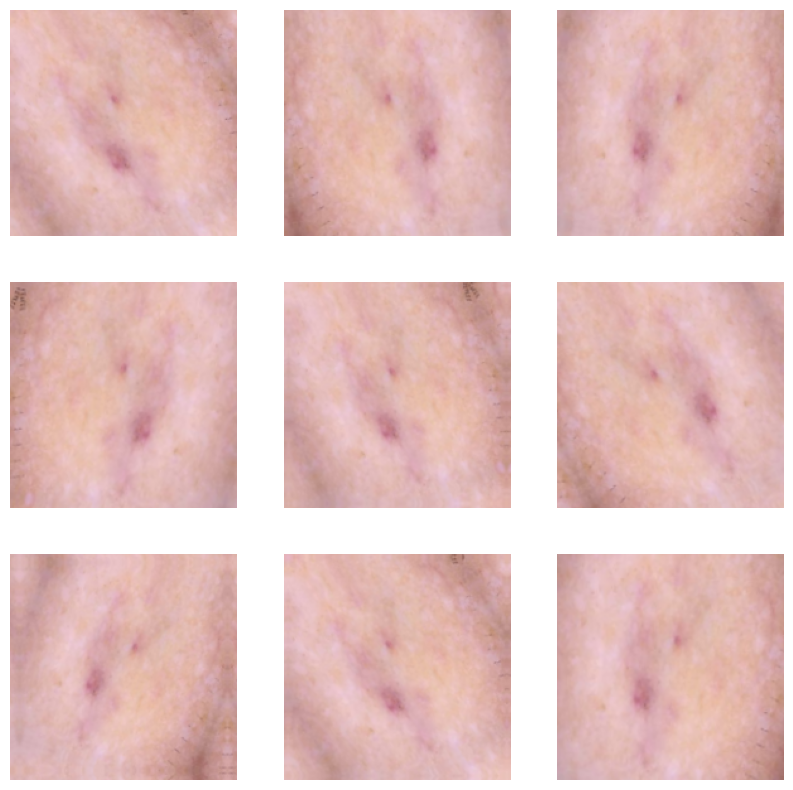

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
241/241 [==============================] - 424s 2s/step - loss: 0.5038 - accuracy: 0.7709 - val_loss: 0.3184 - val_accuracy: 0.8565
Epoch 2/10
241/241 [==============================] - 446s 2s/step - loss: 0.3457 - accuracy: 0.8531 - val_loss: 0.3280 - val_accuracy: 0.8560
Epoch 3/10
241/241 [==============================] - 441s 2s/step - loss: 0.3281 - accuracy: 0.8627 - val_loss: 0.2937 - val_accuracy: 0.8783
Epoch 4/10
241/241 [==============================] - 430s 2s/step - loss: 0.2978 - accuracy: 0.8743 - val_loss: 0.3296 - val_accuracy: 0.8721
Epoch 5/10
241/241 [==============================] - 426s 2s/step - loss: 0.2811 - accuracy: 0.8812 - val_loss: 0.2647 - val_accuracy: 0.8960
Epoch 6/10
241/241 [==============================] - 427s 2s/step - loss: 0.2740 - accuracy: 0.8839 - val_loss: 0.2584 - val_accuracy: 0.8934
Epoch 7/10
241/241 [==============================] - 435s 2s/step - loss: 0.2695 - accuracy: 0.8872 - val_loss: 0.2456 - val_accuracy: 0.8882

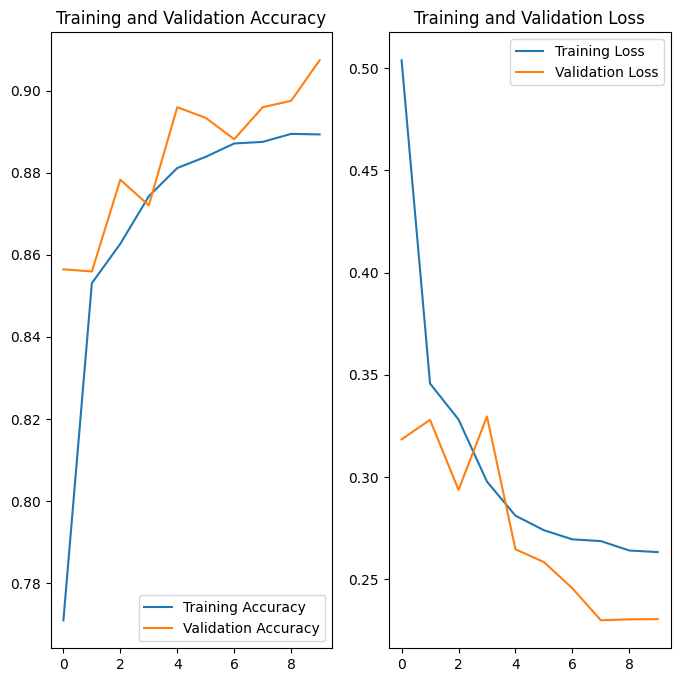

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))


9615


In [ ]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])


[('/content/gdrive/MyDrive/Data/skin cancer detection/melanoma_cancer_dataset/train/benign/melanoma_641.jpg', 'benign'), ('/content/gdrive/MyDrive/Data/skin cancer detection/melanoma_cancer_dataset/train/benign/melanoma_4834.jpg', 'benign')]


In [ ]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()


,Path,Label
0,/content/gdrive/MyDrive/Data/skin cancer detec...,benign
1,/content/gdrive/MyDrive/Data/skin cancer detec...,benign
2,/content/gdrive/MyDrive/Data/skin cancer detec...,benign
3,/content/gdrive/MyDrive/Data/skin cancer detec...,benign
4,/content/gdrive/MyDrive/Data/skin cancer detec...,benign


In [ ]:
original_df[['Label']].value_counts()


Label    
benign       5000
malignant    4615
dtype: int64

In [ ]:
original_df[['Label']].value_counts(normalize=True)


Label    
benign       0.520021
malignant    0.479979
dtype: float64